# Preprocessing 2 - All Data - Lasso

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, Normalizer, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn import set_config
set_config(transform_output='pandas')

from category_encoders import OrdinalEncoder

from src.helpers import *

In [171]:
df = pd.read_csv('../data/train.csv')

In [172]:
df['SalePrice'].max()

np.int64(755000)

(array([ 5.,  0.,  5.,  6.,  6.,  7., 32., 29., 23., 35., 59., 67., 73.,
        92., 89., 91., 62., 60., 57., 73., 67., 54., 45., 33., 30., 31.,
        31., 33., 26., 23., 17., 19., 18., 18., 14., 11.,  5.,  8., 13.,
        12., 10.,  6.,  6.,  5.,  1.,  3.,  5.,  6.,  5.,  4.,  3.,  2.,
         3.,  1.,  3.,  1.,  2.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 34900.,  42101.,  49302.,  56503.,  63704.,  70905.,  78106.,
         85307.,  92508.,  99709., 106910., 114111., 121312., 128513.,
        135714., 142915., 150116., 157317., 164518., 171719., 178920.,
        186121., 193322., 200523., 207724., 214925., 222126., 229327.,
        236528., 243729., 250930., 258131., 265332., 272533., 279734.,
        286935., 294136., 301337., 308538., 315739., 322940., 330141.,
        

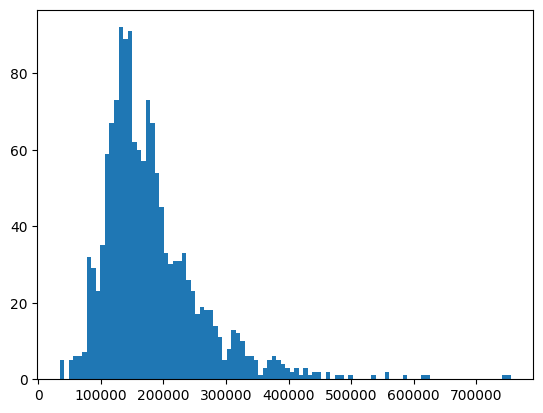

In [194]:
plt.hist(df['SalePrice'],bins=100)

(array([ 2.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  2.,  1.,  1.,  3.,  2.,  1.,  1.,  4.,  0.,  1.,  2.,  3.,
        11., 10., 12., 10., 12., 11.,  7., 11., 16., 13., 23., 35., 23.,
        33., 32., 33., 60., 40., 63., 59., 56., 37., 46., 44., 40., 42.,
        61., 47., 48., 43., 35., 29., 28., 27., 29., 29., 37., 14., 25.,
        21., 18., 24., 17.,  6., 10., 19., 15.,  7., 10.,  3.,  4.,  9.,
        10.,  3.,  3.,  4.,  4.,  1.,  3.,  1.,  1.,  0.,  1.,  1.,  1.,
         1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([10.46024211, 10.49098442, 10.52172673, 10.55246904, 10.58321134,
        10.61395365, 10.64469596, 10.67543827, 10.70618058, 10.73692289,
        10.7676652 , 10.79840751, 10.82914982, 10.85989213, 10.89063444,
        10.92137675, 10.95211906, 10.98286136, 11.01360367, 11.04434598,
        11.07508829, 11.1058306 , 11.13657291, 11.16731522, 11.19805753,
        11.22879984, 11.25954215, 11.29028446, 11.32102677, 11.351769

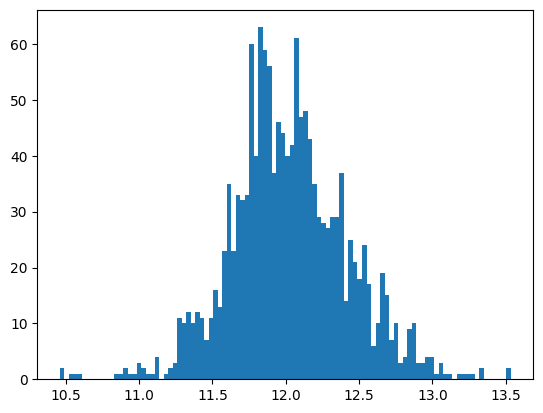

In [199]:
plt.hist(np.log(df['SalePrice']),bins=100)

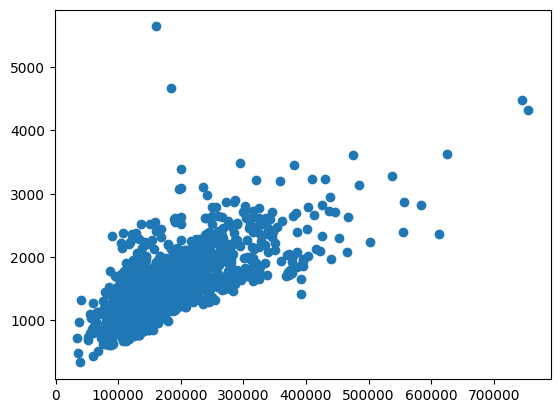

In [173]:
plt.scatter(df['SalePrice'],df['GrLivArea'])

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# ---Pipeline---

### 1. Filter for features to remove

In [175]:
# Defining the list of columns that will go into the pipeline
# Remove columns that should not be included in the pipeline

all_columns = df.columns.tolist()
columns_remove_from_filter = ['SalePrice','Id','Street','Utilities','LowQualFinSF','3SsnPorch','GarageYrBlt']

columns_to_keep = [item for item in all_columns if item not in columns_remove_from_filter]

In [176]:
# Preprocessor to filter unwanted columns, or unexpected columns.

preprocessor_filter = ColumnTransformer([
  ('passthrough','passthrough',columns_to_keep)
],remainder='drop', verbose_feature_names_out=False)

### 2. Imputing null variables

In [177]:
# Preprocessor for imputing all null variables

cols_impute_na = ['Alley', 'GarageType', 'Fence','BsmtQual', 'BsmtCond', 'BsmtExposure',
                  'BsmtFinType1','BsmtFinType2', 'FireplaceQu', 'GarageFinish', 'GarageQual','GarageCond',
                  'PoolQC', 'MiscFeature']
cols_impute_none = ['MasVnrType']
cols_impute_most_freq = ['Electrical','MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional']
cols_impute_zero = ['LotFrontage', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath',
                    'GarageCars','GarageArea']

preprocessor_imputer = ColumnTransformer([
  ('impute_na', SimpleImputer(strategy='constant', fill_value='NA'), cols_impute_na),
  ('impute_none', SimpleImputer(strategy='constant', fill_value='None'), cols_impute_none),
  ('impute_zero', SimpleImputer(strategy='constant', fill_value=0), cols_impute_zero),
  ('impute_most_freq', SimpleImputer(strategy='most_frequent'), cols_impute_most_freq)
], remainder='passthrough', verbose_feature_names_out=False)

### 3. Mapping Ordinal Features

In [178]:
# Defining maps for Ordinal categories

dict_na_ex_6 = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
dict_na_gd_5 = {'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4}
dict_bsmt = {'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
dict_garage = {'NA':0,'Unf':1,'RFn':2,'Fin':3}
dict_fence = {'NA':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}


ordinal_cat_map = [
  {'col':'BsmtQual','mapping':dict_na_ex_6},
  {'col':'BsmtCond','mapping':dict_na_ex_6},
  {'col':'BsmtExposure','mapping':dict_na_gd_5},
  {'col':'BsmtFinType1','mapping':dict_bsmt},
  {'col':'BsmtFinType2','mapping':dict_bsmt},
  {'col':'FireplaceQu','mapping':dict_na_ex_6},
  {'col':'GarageFinish','mapping':dict_garage},
  {'col':'GarageQual','mapping':dict_na_ex_6},
  {'col':'GarageCond','mapping':dict_na_ex_6},
  {'col':'PoolQC','mapping':dict_na_ex_6},
  {'col': 'ExterQual', 'mapping': dict_na_ex_6},
  {'col': 'ExterCond', 'mapping': dict_na_ex_6},
  {'col': 'HeatingQC', 'mapping': dict_na_ex_6},
  {'col': 'KitchenQual', 'mapping': dict_na_ex_6},
  {'col': 'Fence', 'mapping': dict_fence}
  ]

### 4. Encoding and Scaling

In [179]:
# Preprocessor for encoding and scaling

ohe_cols = ['MSSubClass','MSZoning','Alley','LotShape','LandContour','LotConfig','LandSlope',
            'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
            'Exterior2nd','MasVnrType','Foundation','Heating', 'CentralAir','Electrical','Functional',
            'GarageType','PavedDrive','MiscFeature','MoSold','YrSold','SaleType','SaleCondition']

oe_cols = ['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
           'BsmtFinType1','BsmtFinType2','HeatingQC','FireplaceQu', 'GarageFinish','GarageQual', 'GarageCond',
           'PoolQC','KitchenQual','Fence']

standard_cols = ['LotFrontage','GarageArea']

robust_cols = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
               'GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch','PoolArea','MiscVal']

minmax_cols = ['YearBuilt','YearRemodAdd']


preprocessor_encode_scale = ColumnTransformer([
  ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ohe_cols),
  ('oe', OrdinalEncoder(mapping=ordinal_cat_map), oe_cols),
  ('standard_scaler', StandardScaler(), standard_cols),
  ('robust_scaler', RobustScaler(), robust_cols),
  ('minmax_scaler', MinMaxScaler(), minmax_cols)
], remainder='passthrough', verbose_feature_names_out=False)

# --- Train/Val Split, Fit & Transform ---

In [180]:
# Train/Val split, target feature is SalePrice

X = df.drop(columns='SalePrice')
y = df['SalePrice'].copy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
# Main pipeline, include all preprocessors

main_pipe = Pipeline([
  ('preprocessor_filter', preprocessor_filter),
  ('preprocessor_imputer', preprocessor_imputer),
  ('preprocessor_encode_scale', preprocessor_encode_scale)
])

In [182]:
# Fit and transform X_train and X_val

main_pipe.fit(X_train)

X_train_proc = main_pipe.transform(X_train)
X_val_proc = main_pipe.transform(X_val)

In [183]:
# Checking the number of columns after pipeline

len(X_train_proc.columns)

259

# --- Model Evaluation ---

In [184]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

lasso = Lasso(alpha=45)
lasso.fit(X_train_proc, y_train)

linear_results_train = evaluate_regression(lasso, X_train_proc, y_train, 'lasso')
linear_results_val = evaluate_regression(lasso, X_val_proc, y_val, 'lasso')

In [185]:
linear_results_train

,MAE,MSE,RMSE,MAPE,R2,adj_r2
lasso,15126.612098,4.989177e+08,22336.465709,0.089803,0.916353,0.892493


In [186]:
linear_results_val

,MAE,MSE,RMSE,MAPE,R2,adj_r2
lasso,18327.314047,8.513934e+08,29178.646028,0.11013,0.889002,-0.009391


In [187]:
val_preds = lasso.predict(X_val_proc)
pred_log = np.log(val_preds)
y_log = np.log(y_val)
root_mean_squared_error(y_log, pred_log)

0.15057195149604657

In [201]:
lasso.feature_names_in_

array(['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_190', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Alley_Grvl', 'Alley_NA',
       'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod',
       'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighbo

# --- Predicting test ---

In [188]:
# importing the test data

test_data = pd.read_csv('../data/test.csv')

In [189]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [192]:
test_id = test_data.loc[:,'Id'].copy()
test_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [ ]:
# transform test data

test_proc = main_pipe.transform(test_data)

In [ ]:
# predict test

test_pred = lasso.predict(test_proc)
test_pred = pd.DataFrame(test_pred)

In [ ]:
# save results to csv

test_pred.to_csv('../data/test_preds4_lasso.csv', index=False)

In [ ]:
log_y = np.log(y)
y = np.exp(log_y)